In [2]:
import pandas as pd

In [3]:
titanic_df = pd.read_csv('titanic_processed.csv')

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,14.0,0,0,7.8542,0,0,1
1,1,1,1,28.0,0,0,26.5500,0,0,1
2,1,1,0,36.0,1,2,120.0000,0,0,1
3,0,3,1,17.0,1,0,7.0542,0,0,1
4,0,3,1,4.0,4,2,31.2750,0,0,1


In [4]:
titanic_df.shape

(712, 10)

In [5]:
from sklearn.model_selection import train_test_split

X = titanic_df.drop('Survived', axis=1)
Y = titanic_df['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [6]:
x_train.shape, y_train.shape

((569, 9), (569,))

In [7]:
x_test.shape, y_test.shape

((143, 9), (143,))

### Logistic regression for classification

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [8]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(x_train, y_train)

In [9]:
y_pred = logistic_model.predict(x_test)

### Confusion matrix

In [10]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

In [11]:
pred_results.head()

,y_test,y_pred
673,1,1
255,0,0
643,1,1
305,1,1
624,0,0


In [12]:
titanic_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

titanic_crosstab

y_test,0,1
y_pred,,
0,70,19
1,11,43


### Precision-recall scores

When we use these for multiclass classification we need to specify an averaging method to determine how the precision and recall scores for different labels should be weighted

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [14]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)

accuracy_score :  0.7902097902097902
precision_score :  0.7962962962962963
recall_score :  0.6935483870967742


In [15]:
titanic_crosstab

y_test,0,1
y_pred,,
0,70,19
1,11,43


In [16]:
TP = titanic_crosstab[1][1]
TN = titanic_crosstab[0][0]
FP = titanic_crosstab[0][1]
FN = titanic_crosstab[1][0]

In [17]:
accuracy_score_verified = (TP + TN) / (TP + FP + TN + FN)

accuracy_score_verified

0.7902097902097902

In [18]:
precision_score_survived = TP / (TP + FP)

precision_score_survived

0.7962962962962963

In [19]:
recall_score_survived = TP / (TP + FN)
recall_score_survived

0.6935483870967742

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


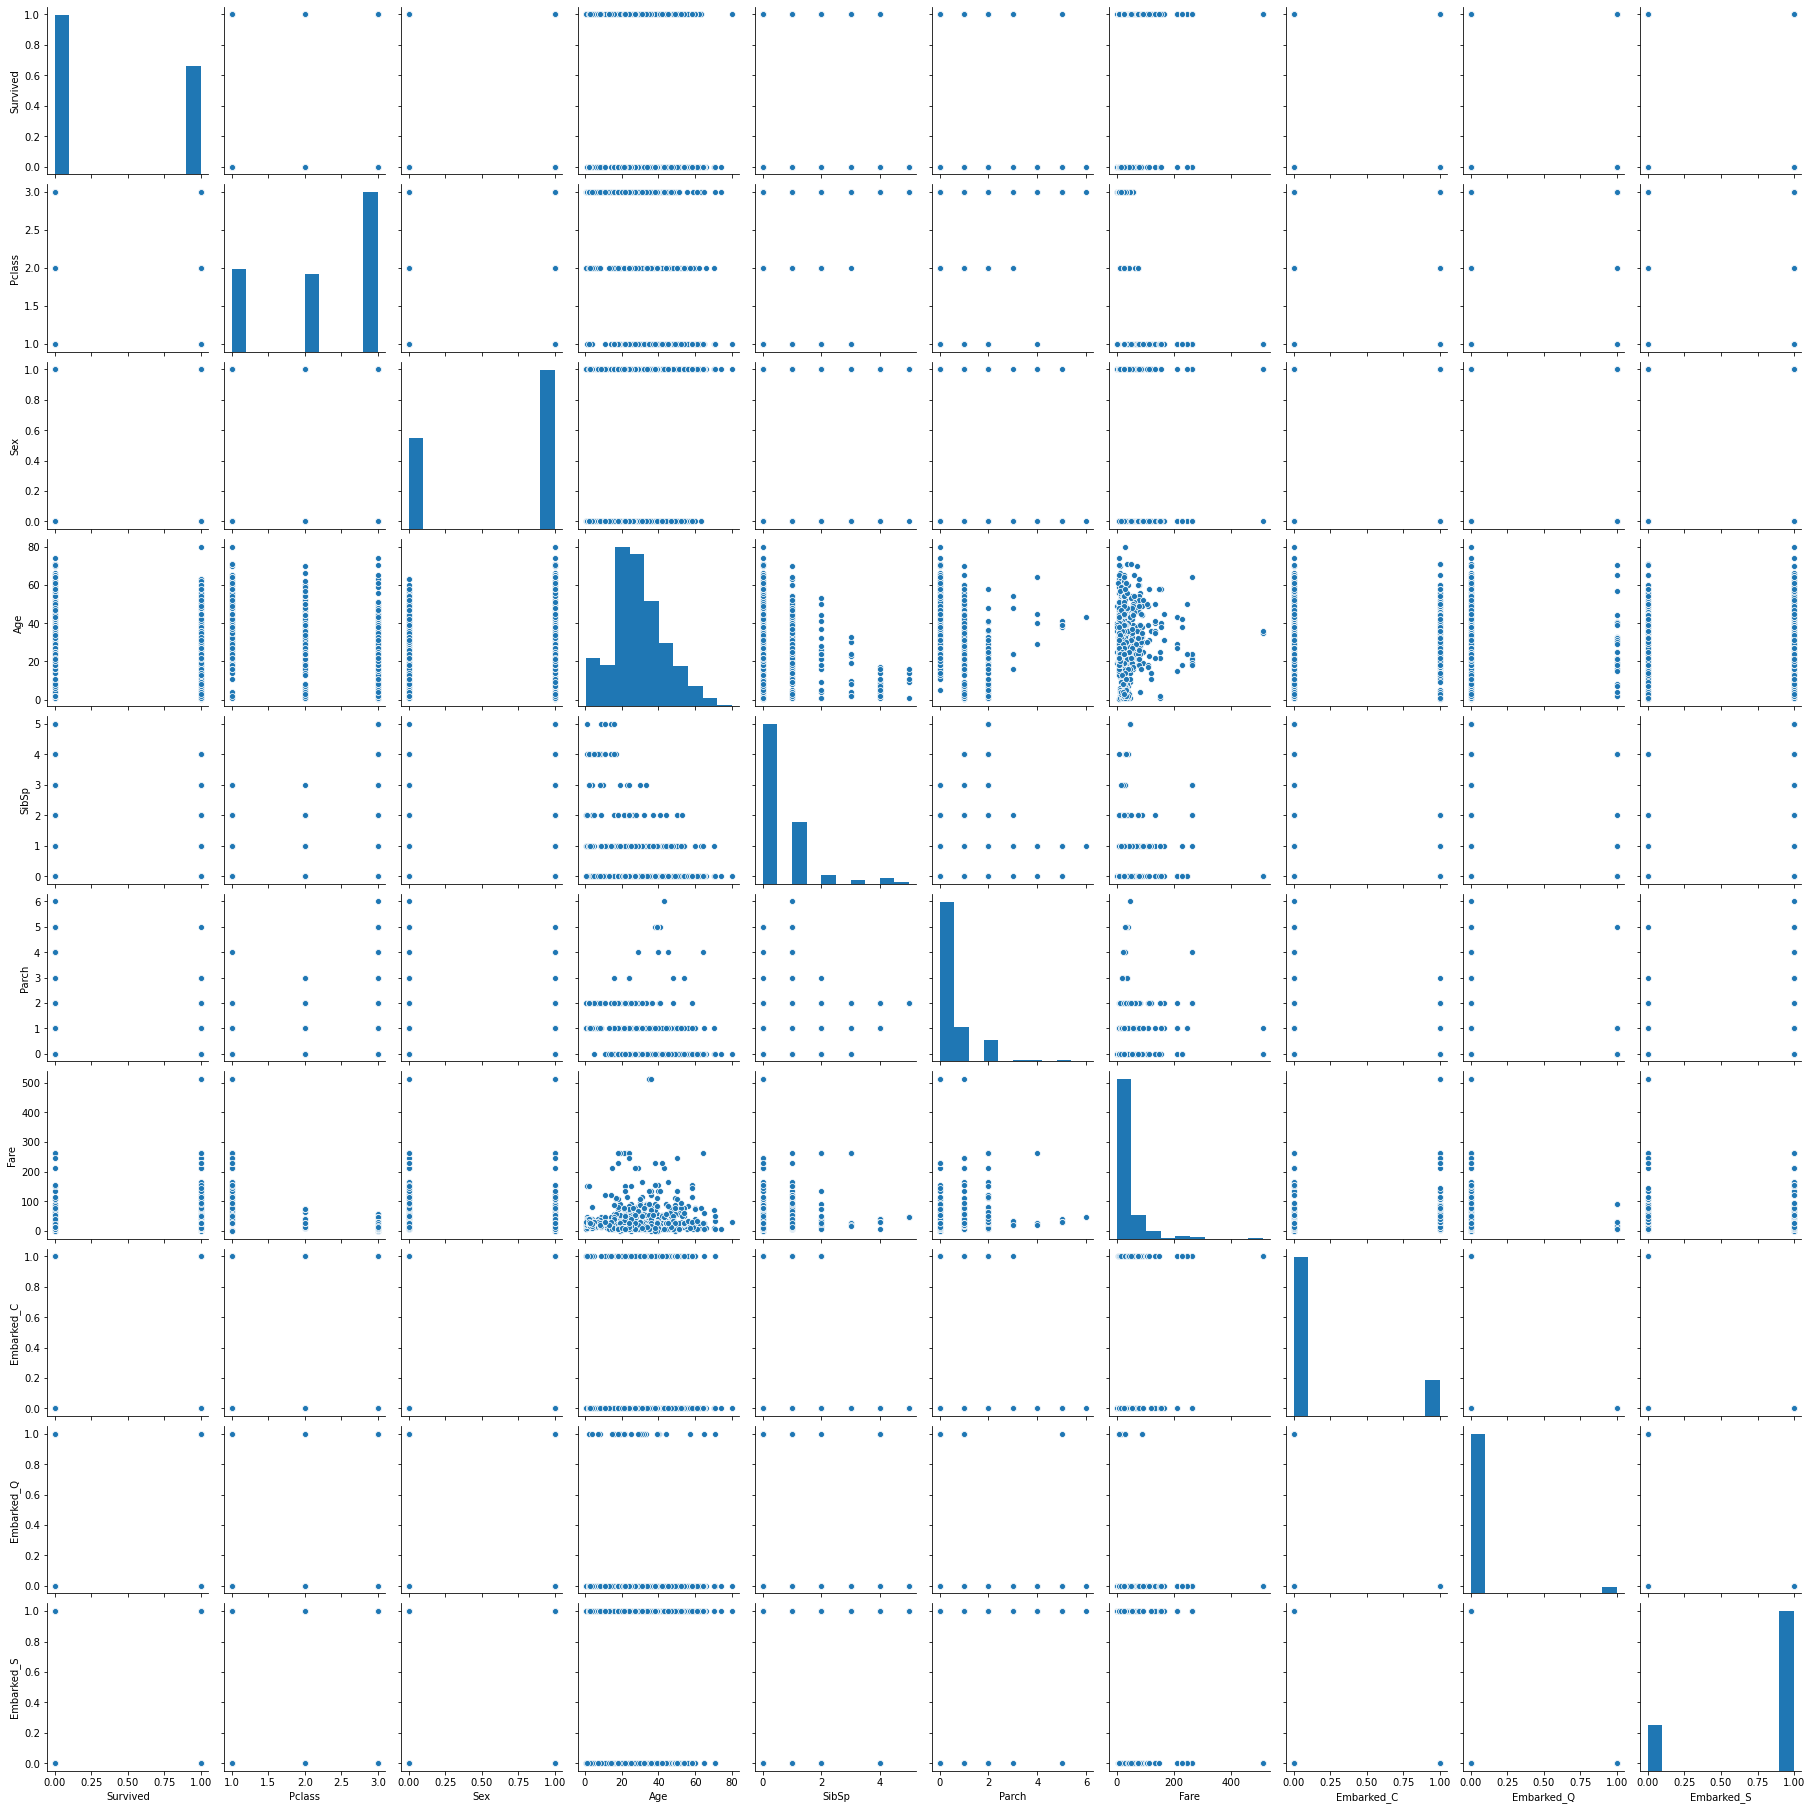

In [21]:
sns.pairplot(titanic_df)
plt.show()


In [28]:
from sklearn.svm import LinearSVC

In [36]:
model = LinearSVC(C=1.0, max_iter=1000, tol=1e-3, dual=False)
model.fit(x_train, y_train) 


LinearSVC(dual=False, tol=0.001)

In [42]:
y_pred_train = model.predict(x_train)

In [50]:
print(accuracy_score(y_train, y_pred_train, normalize=True))
print(precision_score(y_train, y_pred_train))
print(recall_score(y_train, y_pred_train))

0.7943760984182777
0.7658536585365854
0.6946902654867256


In [46]:
y_pred = model.predict(x_test)

In [51]:
print(accuracy_score(y_test, y_pred, normalize=True))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.7762237762237763
0.7777777777777778
0.6774193548387096


In [54]:

pd.crosstab(pd.DataFrame({'y_test': y_test,'y_pred': y_pred}).y_pred, pred_results.y_test)

y_test,0,1
y_pred,,
0,69,20
1,12,42
